In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv("inputData/Space_titanic.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<Axes: >

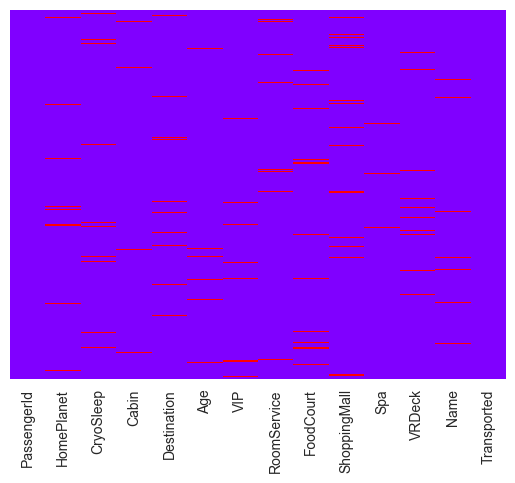

In [3]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap ="rainbow")
# Age and Cabin are a lot of NaN data

## Handle missing data

C:\Users\Ronny\AppData\Local\Temp\ipykernel_2920\1598082348.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RoomService"].fillna(0,inplace=True)
C:\Users\Ronny\AppData\Local\Temp\ipykernel_2920\1598082348.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

<Axes: >

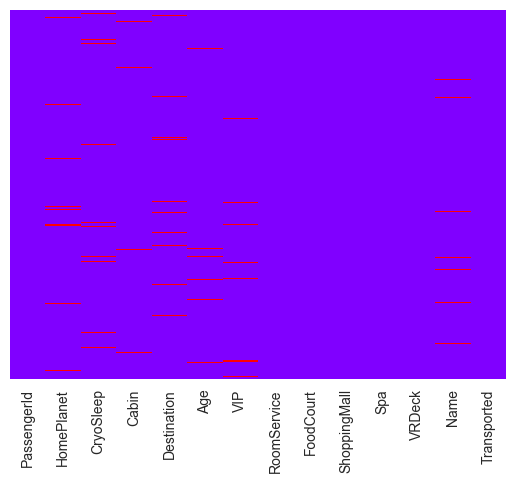

In [4]:
df["RoomService"].fillna(0,inplace=True)
df["FoodCourt"].fillna(0,inplace=True)
df["ShoppingMall"].fillna(0,inplace=True)
df["Spa"].fillna(0,inplace=True)
df["VRDeck"].fillna(0,inplace=True)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap ="rainbow")

In [5]:
df.dropna(subset=['HomePlanet'], axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8492 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8492 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8277 non-null   object 
 3   Cabin         8299 non-null   object 
 4   Destination   8314 non-null   object 
 5   Age           8315 non-null   float64
 6   VIP           8292 non-null   object 
 7   RoomService   8492 non-null   float64
 8   FoodCourt     8492 non-null   float64
 9   ShoppingMall  8492 non-null   float64
 10  Spa           8492 non-null   float64
 11  VRDeck        8492 non-null   float64
 12  Name          8299 non-null   object 
 13  Transported   8492 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 937.1+ KB


In [6]:
# We replace the age for each class with the average age of the passenger class
for i in df.index:
    if pd.isnull(df.at[i, "Age"]):
        pclass = df.at[i,"HomePlanet"]
        pclass_1_data = df[df['HomePlanet'] == pclass]
        mean_age_pclass = pclass_1_data['Age'].mean()
        df.at[i, "Age"] = mean_age_pclass
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 8492 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8492 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8277 non-null   object 
 3   Cabin         8299 non-null   object 
 4   Destination   8314 non-null   object 
 5   Age           8492 non-null   float64
 6   VIP           8292 non-null   object 
 7   RoomService   8492 non-null   float64
 8   FoodCourt     8492 non-null   float64
 9   ShoppingMall  8492 non-null   float64
 10  Spa           8492 non-null   float64
 11  VRDeck        8492 non-null   float64
 12  Name          8299 non-null   object 
 13  Transported   8492 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 1.2+ MB


In [7]:
df.dropna(subset=['Destination'], axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8314 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8314 non-null   object 
 1   HomePlanet    8314 non-null   object 
 2   CryoSleep     8103 non-null   object 
 3   Cabin         8125 non-null   object 
 4   Destination   8314 non-null   object 
 5   Age           8314 non-null   float64
 6   VIP           8117 non-null   object 
 7   RoomService   8314 non-null   float64
 8   FoodCourt     8314 non-null   float64
 9   ShoppingMall  8314 non-null   float64
 10  Spa           8314 non-null   float64
 11  VRDeck        8314 non-null   float64
 12  Name          8125 non-null   object 
 13  Transported   8314 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 917.5+ KB


<Axes: >

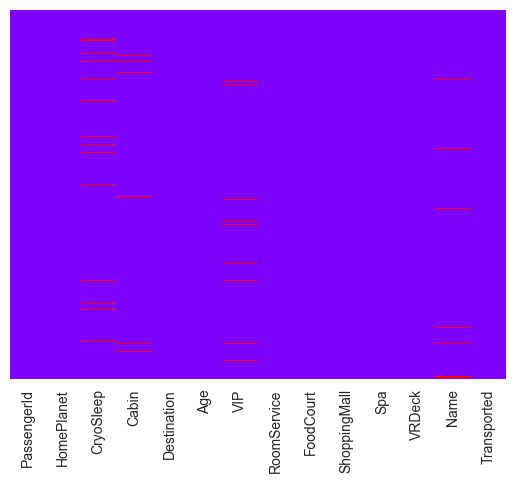

In [8]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap ="rainbow")

In [9]:
df.drop(["PassengerId","Name"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8314 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8314 non-null   object 
 1   CryoSleep     8103 non-null   object 
 2   Cabin         8125 non-null   object 
 3   Destination   8314 non-null   object 
 4   Age           8314 non-null   float64
 5   VIP           8117 non-null   object 
 6   RoomService   8314 non-null   float64
 7   FoodCourt     8314 non-null   float64
 8   ShoppingMall  8314 non-null   float64
 9   Spa           8314 non-null   float64
 10  VRDeck        8314 non-null   float64
 11  Transported   8314 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 787.6+ KB


In [10]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7736 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7736 non-null   object 
 1   CryoSleep     7736 non-null   object 
 2   Cabin         7736 non-null   object 
 3   Destination   7736 non-null   object 
 4   Age           7736 non-null   float64
 5   VIP           7736 non-null   object 
 6   RoomService   7736 non-null   float64
 7   FoodCourt     7736 non-null   float64
 8   ShoppingMall  7736 non-null   float64
 9   Spa           7736 non-null   float64
 10  VRDeck        7736 non-null   float64
 11  Transported   7736 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 732.8+ KB


In [11]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [12]:
## Creat dummys and handle string columns

In [13]:
df["CryoSleep"] =df["CryoSleep"].astype(int)
df["VIP"] =df["VIP"].astype(int)
df["Transported"] =df["Transported"].astype(int)
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


In [14]:
split_data = df['Cabin'].str.split('/', expand=True, n=-1)

#Concatenate the split columns with the original DataFrame
df = pd.concat([df, split_data], axis=1)
df.rename(columns={0:"deck",1:"num",2:"side"},inplace=True)
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,A,98,P
8689,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0,G,1499,S
8690,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,G,1500,S
8691,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,E,608,S


<Axes: xlabel='deck', ylabel='count'>

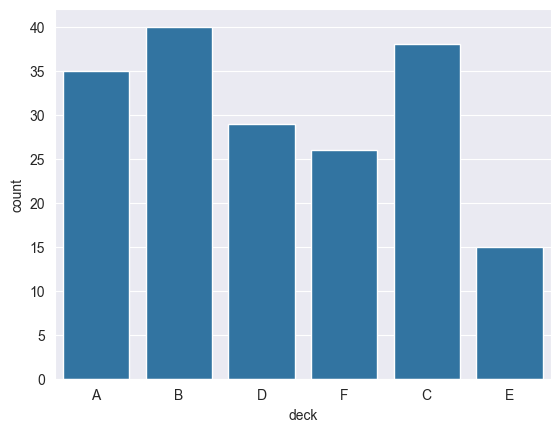

In [15]:
#df = df.loc[:,~df.columns.duplicated()]
df
#sns.countplot(x="VIP",data=df,hue="deck")
df_test = df[df["VIP"]==1]
sns.countplot(x="deck",data=df_test)

In [16]:
deck = pd.get_dummies(df['deck'], drop_first=True).astype(int)
df = pd.concat([df, deck], axis=1)
df.drop(["deck"],axis=1,inplace=True)

df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Transported,num,side,B,C,D,E,F,G,T
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,...,0,0,P,1,0,0,0,0,0,0
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,...,1,0,S,0,0,0,0,1,0,0
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,...,0,0,S,0,0,0,0,0,0,0
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,...,0,0,S,0,0,0,0,0,0,0
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,...,1,1,S,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,...,0,98,P,0,0,0,0,0,0,0
8689,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,...,0,1499,S,0,0,0,0,0,1,0
8690,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,...,1,1500,S,0,0,0,0,0,1,0
8691,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,...,0,608,S,0,0,0,1,0,0,0


In [17]:
df.rename(columns={"B":"deck_B","C":"deck_C","D":"deck_D","E":"deck_E","F":"deck_F","G":"deck_G","T":"deck_T"},inplace=True)
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Transported,num,side,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,...,0,0,P,1,0,0,0,0,0,0
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,...,1,0,S,0,0,0,0,1,0,0
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,...,0,0,S,0,0,0,0,0,0,0
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,...,0,0,S,0,0,0,0,0,0,0
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,...,1,1,S,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,...,0,98,P,0,0,0,0,0,0,0
8689,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,...,0,1499,S,0,0,0,0,0,1,0
8690,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,...,1,1500,S,0,0,0,0,0,1,0
8691,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,...,0,608,S,0,0,0,1,0,0,0


In [18]:
df["Destination"].value_counts()

Destination
TRAPPIST-1e      5372
55 Cancri e      1639
PSO J318.5-22     725
Name: count, dtype: int64

In [19]:
destination = pd.get_dummies(df['Destination'], drop_first=True).astype(int)
df = pd.concat([df, destination], axis=1)
df.drop(["Destination"],axis=1,inplace=True)

df

,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,side,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,PSO J318.5-22,TRAPPIST-1e
0,Europa,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,...,P,1,0,0,0,0,0,0,0,1
1,Earth,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,...,S,0,0,0,0,1,0,0,0,1
2,Europa,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,...,S,0,0,0,0,0,0,0,0,1
3,Europa,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,...,S,0,0,0,0,0,0,0,0,1
4,Earth,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,...,S,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,A/98/P,41.0,1,0.0,6819.0,0.0,1643.0,74.0,...,P,0,0,0,0,0,0,0,0,0
8689,Earth,1,G/1499/S,18.0,0,0.0,0.0,0.0,0.0,0.0,...,S,0,0,0,0,0,1,0,1,0
8690,Earth,0,G/1500/S,26.0,0,0.0,0.0,1872.0,1.0,0.0,...,S,0,0,0,0,0,1,0,0,1
8691,Europa,0,E/608/S,32.0,0,0.0,1049.0,0.0,353.0,3235.0,...,S,0,0,0,1,0,0,0,0,0


In [20]:
df.rename(columns={"PSO J318.5-22":"pso","TRAPPIST-1e":"trap"},inplace=True)
df

,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,side,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,pso,trap
0,Europa,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,...,P,1,0,0,0,0,0,0,0,1
1,Earth,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,...,S,0,0,0,0,1,0,0,0,1
2,Europa,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,...,S,0,0,0,0,0,0,0,0,1
3,Europa,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,...,S,0,0,0,0,0,0,0,0,1
4,Earth,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,...,S,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,A/98/P,41.0,1,0.0,6819.0,0.0,1643.0,74.0,...,P,0,0,0,0,0,0,0,0,0
8689,Earth,1,G/1499/S,18.0,0,0.0,0.0,0.0,0.0,0.0,...,S,0,0,0,0,0,1,0,1,0
8690,Earth,0,G/1500/S,26.0,0,0.0,0.0,1872.0,1.0,0.0,...,S,0,0,0,0,0,1,0,0,1
8691,Europa,0,E/608/S,32.0,0,0.0,1049.0,0.0,353.0,3235.0,...,S,0,0,0,1,0,0,0,0,0


In [21]:
df.info()
df.drop(["Cabin"],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 7736 entries, 0 to 8692
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7736 non-null   object 
 1   CryoSleep     7736 non-null   int32  
 2   Cabin         7736 non-null   object 
 3   Age           7736 non-null   float64
 4   VIP           7736 non-null   int32  
 5   RoomService   7736 non-null   float64
 6   FoodCourt     7736 non-null   float64
 7   ShoppingMall  7736 non-null   float64
 8   Spa           7736 non-null   float64
 9   VRDeck        7736 non-null   float64
 10  Transported   7736 non-null   int32  
 11  num           7736 non-null   object 
 12  side          7736 non-null   object 
 13  deck_B        7736 non-null   int32  
 14  deck_C        7736 non-null   int32  
 15  deck_D        7736 non-null   int32  
 16  deck_E        7736 non-null   int32  
 17  deck_F        7736 non-null   int32  
 18  deck_G        7736 non-null   int

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7736 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7736 non-null   object 
 1   CryoSleep     7736 non-null   int32  
 2   Age           7736 non-null   float64
 3   VIP           7736 non-null   int32  
 4   RoomService   7736 non-null   float64
 5   FoodCourt     7736 non-null   float64
 6   ShoppingMall  7736 non-null   float64
 7   Spa           7736 non-null   float64
 8   VRDeck        7736 non-null   float64
 9   Transported   7736 non-null   int32  
 10  num           7736 non-null   object 
 11  side          7736 non-null   object 
 12  deck_B        7736 non-null   int32  
 13  deck_C        7736 non-null   int32  
 14  deck_D        7736 non-null   int32  
 15  deck_E        7736 non-null   int32  
 16  deck_F        7736 non-null   int32  
 17  deck_G        7736 non-null   int32  
 18  deck_T        7736 non-null   int

In [23]:
planet = pd.get_dummies(df['HomePlanet'], drop_first=True).astype(int)
df = pd.concat([df, planet], axis=1)
df.drop(["HomePlanet"],axis=1,inplace=True)

df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,num,...,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,pso,trap,Europa,Mars
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,98,...,0,0,0,0,0,0,0,0,1,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1499,...,0,0,0,0,1,0,1,0,0,0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1500,...,0,0,0,0,1,0,0,1,0,0
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,608,...,0,0,1,0,0,0,0,0,1,0


In [24]:
side = pd.get_dummies(df['side'], drop_first=True).astype(int)
df = pd.concat([df, side], axis=1)
df.drop(["side","num"],axis=1,inplace=True)

df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck_B,...,deck_D,deck_E,deck_F,deck_G,deck_T,pso,trap,Europa,Mars,S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,1,1,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,0,0,1,0,0,0,1,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,...,0,0,0,0,0,0,1,1,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,...,0,0,0,0,0,0,0,1,0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,1,0,1,0,0,0,1
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,0,...,0,0,0,1,0,0,1,0,0,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [25]:
df.rename(columns={"S":"starboard"},inplace=True)
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck_B,...,deck_D,deck_E,deck_F,deck_G,deck_T,pso,trap,Europa,Mars,starboard
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,1,1,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,0,0,1,0,0,0,1,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,...,0,0,0,0,0,0,1,1,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,...,0,0,0,0,0,0,0,1,0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,1,0,1,0,0,0,1
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,0,...,0,0,0,1,0,0,1,0,0,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0,...,0,1,0,0,0,0,0,1,0,1


## Analysis

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop(["Transported","deck_B","deck_C","deck_D","deck_E","deck_F","deck_G","deck_T","VIP"],axis=1)
y = df["Transported"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [28]:
X_train

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,pso,trap,Europa,Mars,starboard
1387,0,29.0,0.0,2509.0,0.0,16.0,698.0,0,1,1,0,1
4059,0,40.0,2320.0,0.0,4874.0,3131.0,498.0,0,0,1,0,1
3830,1,30.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
1711,1,17.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
7463,0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5874,0,29.0,25.0,0.0,2.0,0.0,657.0,1,0,0,0,1
6059,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
974,1,61.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
8543,0,26.0,733.0,0.0,1296.0,80.0,0.0,0,1,0,1,1


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logReg_df = LogisticRegression(max_iter = 10000)
logReg_df.fit(X_train, y_train)
predictions = logReg_df.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix

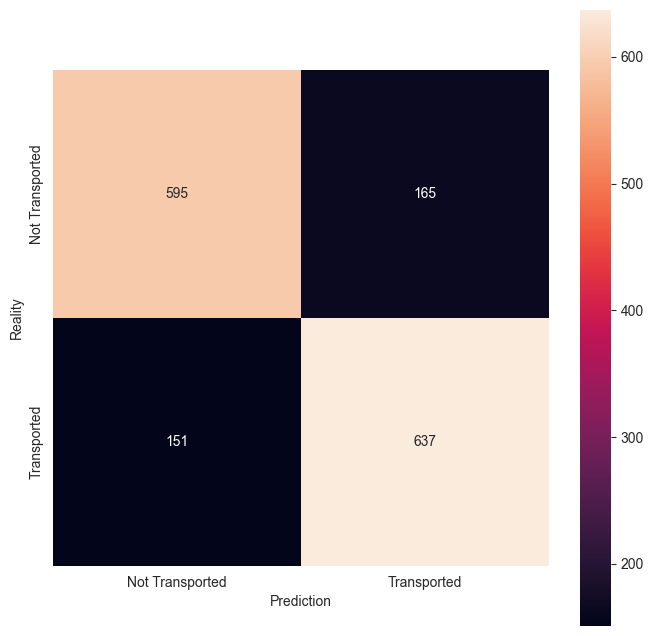

In [32]:
matrix = confusion_matrix(y_test, predictions)
fig = plt.figure(figsize=(8,8))
sns.heatmap(matrix,square=True,annot=True,fmt="d",cbar=True,
            xticklabels=("Not Transported","Transported"),
            yticklabels=("Not Transported","Transported"))
plt.ylabel("Reality")
plt.xlabel("Prediction")
plt.show()

In [33]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, predictions)

# Output the accuracy
print("Accuracy:", accuracy * 100, "%")

Accuracy: 79.58656330749353 %


In [34]:
# insert an intercept
df['intercept'] = 1

X = df[["intercept","CryoSleep",'Age','VIP','RoomService','FoodCourt','ShoppingMall', 'Spa', 'VRDeck',
 'pso',
 'trap',
 'Europa',
 'Mars',
 'starboard']]


y = df['Transported']

# Perform logistic regression without intercept
logit_model = sm.Logit(y, X)
result = logit_model.fit()


result.summary()

Optimization terminated successfully.
         Current function value: 0.439005
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Transported   No. Observations:                 7736
Model:                          Logit   Df Residuals:                     7722
Method:                           MLE   Df Model:                           13
Date:                Sat, 03 Feb 2024   Pseudo R-squ.:                  0.3666
Time:                        05:40:00   Log-Likelihood:                -3396.1
converged:                       True   LL-Null:                       -5362.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -0.0323      0.104     -0.312      0.755      -0.236       0.171
CryoSleep        1.3279      0.077     17.297      0.000       1.177       1.478
Age             -0.0089      0.002     -4.170      0.000      -0.013      -0.005
VIP             -0.4015      0.248     -1.619      0.105      -0.887       0.084
RoomService     -0.0014   9.43e-05    -15.042      0.000      -0.002      -0.001
FoodCourt        0.0005   4.01e-05     12.631      0.000       0.000       0.001
ShoppingMall     0.0006   7.02e-05      8.460      0.000       0.000       0.001
Spa             -0.0019      0.000    -17.612      0.000      -0.002      -0.002
VRDeck          -0.0018      0.000    -17.150      0.000      -0.002      -0.002
pso             -0.4414      0.117     -3.757      0.000      -0.672      -0.211
trap            -0.4955      0.084     -5.925      0.000      -0.659      -0.332
Europa           2.1550      0.124     17.334      0.000       1.911       2.399
Mars             0.6848      0.081      8.435      0.000       0.526       0.844
starboard        0.5822      0.061      9.621      0.000       0.464       0.701
================================================================================
"""

In [35]:
column_names = df.columns.tolist()
column_names

['CryoSleep',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported',
 'deck_B',
 'deck_C',
 'deck_D',
 'deck_E',
 'deck_F',
 'deck_G',
 'deck_T',
 'pso',
 'trap',
 'Europa',
 'Mars',
 'starboard',
 'intercept']